# Orders

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
order_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/orders.csv/orders.csv')

In [4]:
order_df.head(30)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [5]:
order_df.tail(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421068,803273,206208,test,50,5,11,4.0
3421069,3154581,206209,prior,1,3,11,NaN
3421070,1889163,206209,prior,2,3,17,7.0
3421071,1542354,206209,prior,3,5,11,30.0
3421072,688306,206209,prior,4,1,10,30.0
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0


orders 데이터셋에는 train, test, prior 값들이 모두 들어가 있어서, <br>
실제 고객 구매 현황을 확인하기 위해서 prior 값만 뽑아냈다.

In [6]:
order_prior_df = order_df[order_df['eval_set']=='prior']
order_prior_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [7]:
order_prior_df.shape
# 약 321만 개의 row, column은 7개이다

(3214874, 7)

In [8]:
order_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214874 entries, 0 to 3421081
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 196.2+ MB


@ eval_set만 object 타입, 나중에 숫자로 변환하는 게 좋지 않을까? (ex. 0, 1, 2)

- order_id: order identifier
- user_id: customer identifier
- eval_set: which evaluation set this order belongs in - (see SET described below)
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- order_hour_of_day: the hour of the day the order was placed on
- days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

- order_id : 주문 번호
- user_id : 고객 식별번호
- eval_set :  주문이 어떤 set에 속하는지(prior, train, test)
- order_number : 주문번호, 한 유저가 연속으로 몇개를 주문했는지 보여준다
- order_dow : 주문이 발생된 요일
- order_hour_of_day : 주문이 발생된 시간
- days_since_prior : 마지막 주문으로부터 얼마나 지났는지(최대 한도는 30일)

@ order_dow : 요일이 숫자로 되어 있는데, 어떤 요일이 어떤 숫자인지 파악이 필요하다 <br> >> 그레고리력에 의해 일\~토: 0\~6으로 보기


@ user_id가 달라도 각각의 제품에 따라 기록이 따로 되고 있으므로, 
- 각 고객의 구매 성향
- 충성 고객(vip)의 수 파악(구매 갯수에 따라 - order_number)
- 요일 별/ 시간 별 주문 통계
- 어떤 고객이 / 어떤 제품을 얼마나 자주 구매하는가? (days_since_prior)
등을 살펴볼 수 있을 것으로 기대된다

In [9]:
user_count = order_prior_df['user_id'].value_counts()
user_count
# 고객 한 사람당 최대 99건, 최소 3건의 주문을 했음을 확인
# 총 고객 숫자는 206209명

152340    99
185641    99
185524    99
81678     99
70922     99
          ..
13046      3
70208      3
111440     3
31762      3
47980      3
Name: user_id, Length: 206209, dtype: int64

In [10]:
user_count_df = pd.DataFrame([user_count])
user_count_df = user_count_df.T    # user_count_df.transpose()를 써도 같다
user_count_df

,user_id
152340,99
185641,99
185524,99
81678,99
70922,99
...,...
13046,3
70208,3
111440,3
31762,3


In [11]:
# 구매 건수 별 구매 고객 수 확인
user_count_df.value_counts()
# 왜 98건까지만 나올까??

user_id
3          23986
4          19590
5          16165
6          13850
7          11700
           ...  
93            57
90            56
96            54
97            50
98            47
Length: 97, dtype: int64

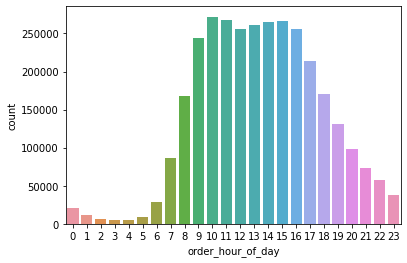

In [12]:
# 어느 시간대에 구매가 많이 이루어졌는지 확인
sns.countplot(data=order_prior_df, x='order_hour_of_day')
# 오전 7시부터 급격히 상승하여 오전 10시에 peak, 낮 12시에 약간 감소하다가 다시 상승하고, 16시 경부터 급격히 하락하기 시작
# 9 ~ 16시 사이에 가장 많은 구매가 이루어진다는 것을 알 수 있다
# 온라인 쇼핑의 특징일 수 있음

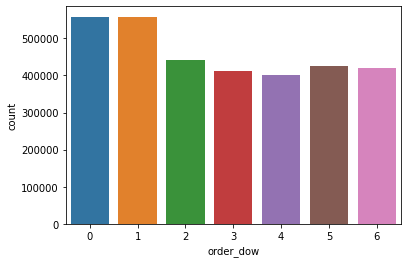

In [13]:
# 어느 요일에 구매가 많이 이루어졌는지를 확인
sns.countplot(data=order_prior_df, x='order_dow')
# 0과 1, 즉 일 & 월에 구매가 가장 많다. (+ 희성님 참고자료 첨부: 온라인 쇼핑 특징)

In [14]:
# 시간&요일별 pivot table 만들기
hod_dow_pt = pd.pivot_table(order_prior_df, values='order_number', aggfunc='count', index=['order_dow'], columns=['order_hour_of_day'])
hod_dow_pt

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3692,2235,1299,888,750,1076,3138,11530,26223,37990,...,50484,50020,45930,36874,27347,20972,16984,13425,10440,6393
1,3475,1735,1063,711,761,1523,5101,15792,32563,49533,...,44220,43913,42200,34610,27293,20926,15422,11292,8458,5322
2,2906,1485,892,679,700,1330,4524,12550,23488,34499,...,35102,35408,35482,30216,24886,18922,14223,10071,7671,5079
3,2767,1407,889,605,666,1265,4314,11739,21305,30653,...,32863,33909,33284,28619,23536,18105,13064,9718,7732,4895
4,2476,1414,837,640,694,1251,4135,11823,20597,29645,...,31665,32095,32175,27577,22872,18194,13351,10169,8274,5308
5,2989,1539,953,796,857,1466,4573,12590,22623,32258,...,35131,35218,33700,28086,22700,17513,12557,8956,7006,4953
6,3067,1781,1137,801,747,1061,3007,10632,21522,28918,...,36091,35569,33178,28098,22364,16988,12508,9805,7959,5663


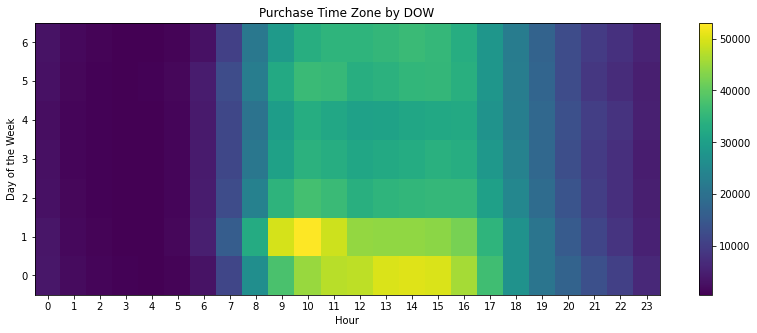

In [15]:
# 시간&요일별 히트맵 그리기
# 참고: https://noodle.tistory.com/15
plt.figure(figsize=(14,5))
plt.pcolor(hod_dow_pt)
plt.xticks(np.arange(0.5,len(hod_dow_pt.columns),1),hod_dow_pt.columns)
plt.yticks(np.arange(0.5,len(hod_dow_pt.index),1),hod_dow_pt.index)
plt.title('요일별 종료 시간 히트맵')
plt.title('Purchase Time Zone by DOW')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.colorbar()
plt.show()

# 일요일 낮(13-15) & 월요일 오전(9-11)에 구매량이 높은 편임을 알 수 있다
# 금-토 여가를 즐긴 후, 가정에서 휴식을 취할 때 / 월요일 아침 출근 후 구매가 많이 발생한다고 유추할 수 있다

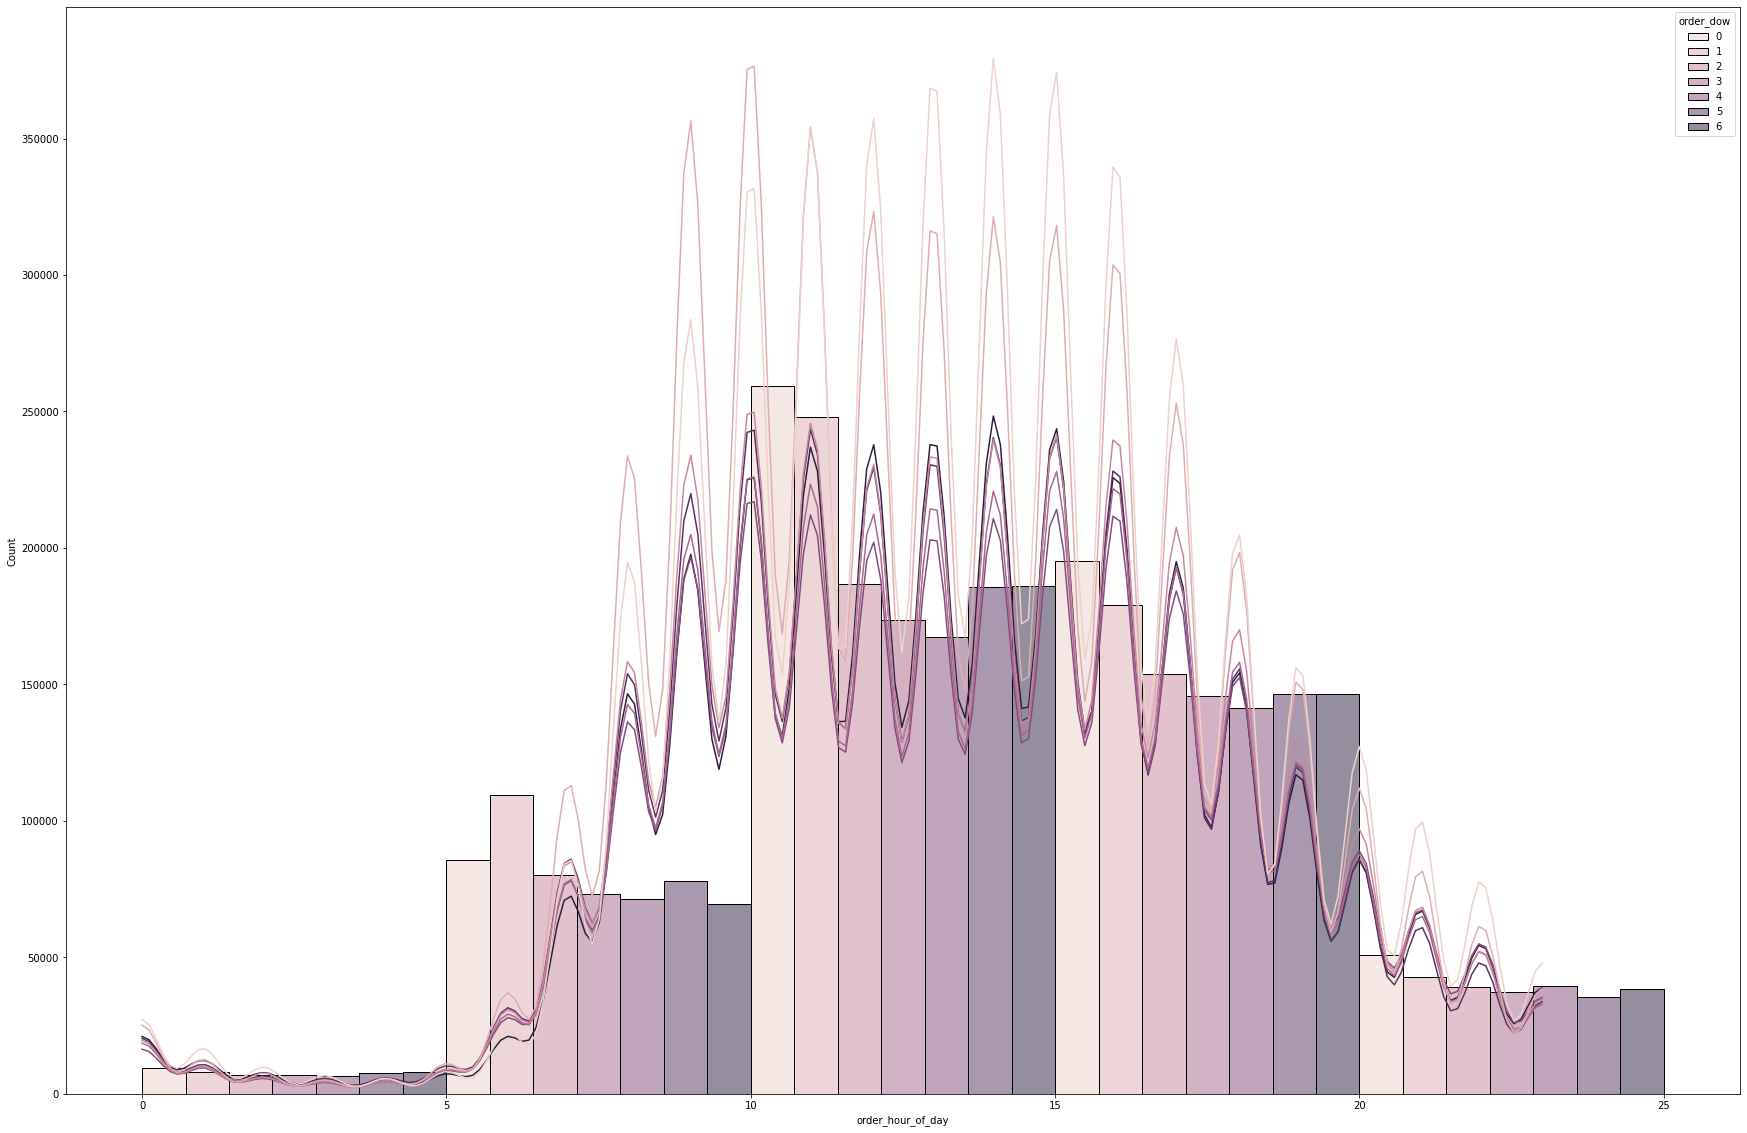

In [16]:
# 시간별 
plt.figure(figsize=(30,20))
sns.histplot(data=order_df, x='order_hour_of_day', hue='order_dow', multiple='dodge', binwidth=5, kde=True)

--- 

# Aisles

In [17]:
aisles_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/aisles.csv/aisles.csv')

In [18]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
aisles_df.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [20]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [21]:
aisles_df.shape
# 총 134 종류의 제품

(134, 2)

In [22]:
aisles_df.value_counts()
# 소분류라서 제품이 겹치지 않고 총 134개의 종류이다

aisle_id  aisle                     
1         prepared soups salads         1
85        food storage                  1
99        canned fruit applesauce       1
98        juice nectars                 1
97        baking supplies decor         1
                                       ..
40        dog food care                 1
39        seafood counter               1
38        frozen meals                  1
37        ice cream ice                 1
134       specialty wines champagnes    1
Length: 134, dtype: int64

---

# Products

In [23]:
products_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/products.csv/products.csv')

In [24]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [25]:
products_df.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
products_df.shape

(49688, 4)

In [28]:
products_df.value_counts()
# 49688개의 서로 다른 상품이 있다

product_id  product_name                                     aisle_id  department_id
1           Chocolate Sandwich Cookies                       61        19               1
33142       Black Raspberry Water                            100       21               1
33120       Organic Egg Whites                               86        16               1
33121       Oikos Yogurt Drink, Strawberry                   120       16               1
33122       Peanut Butter Dark Chocolate Protein Chewy Bars  3         19               1
                                                                                       ..
16566       Fajita Mix                                       123       4                1
16567       Premium Enriched Egg Noodles Barley Shape        33        6                1
16568       Dishwasher Detergent                             74        17               1
16569       Hummus Original                                  67        20               1
49688       Fre

- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key

- product_id : 상품 식별자
- product_name : 상품명
- aisle_id : 외래키
- department_id : 외래키

---

# Departments

In [29]:
dep_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/departments.csv/departments.csv')

In [30]:
dep_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [31]:
dep_df.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [32]:
dep_df.shape

(21, 2)

In [33]:
dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [34]:
dep_df.value_counts()
# 총 21개의 대분류

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
dtype: int64

- department_id: department identifier
- department: the name of the department

- department_id: 대분류 식별자
- department: 대분류 명

---

# Order_products_prior

In [35]:
opp_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')

In [36]:
opp_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [37]:
opp_df.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [38]:
opp_df.shape
# 상품 구매건수가 총 32,434,489건

(32434489, 4)

In [39]:
# 재구매비율이 얼마나 되는지 확인
opp_df_reorder = pd.DataFrame(opp_df['reordered'])
opp_df_reorder

,reordered
0,1
1,1
2,0
3,1
4,0
...,...
32434484,1
32434485,0
32434486,0
32434487,1


In [40]:
opp_df_reorder.value_counts()
# 재구매: 19,126,536건
# 첫 구매: 13,307,953건

reordered
1            19126536
0            13307953
dtype: int64

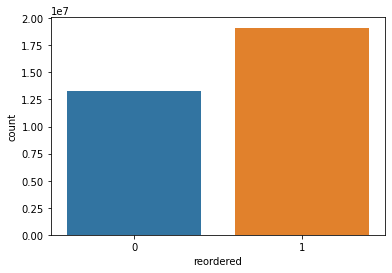

In [41]:
sns.countplot(data=opp_df_reorder, x='reordered')
# 재구매가 첫 구매에 비해서 높다
# 기존 구매 고객층(특히 vip)을 굳건히 할 필요성의 근거

In [42]:
opp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문 순서
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

---

# Order_products_train

In [43]:
opt_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')

In [44]:
opt_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [45]:
opt_df.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [46]:
opt_df.shape

(1384617, 4)

In [47]:
opt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문 순서
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

# Merge

우리 회사(Instacart)는 다양한 마켓을 연결하여 고객에게 상품을 제공하는 온라인 쇼핑몰이다. <br>
우리 회사는 직접 상품을 판매하는 회사가 아니므로, 거래 시 발생하는 수수료를 통해 매출을 증대해야 한다. <br>
따라서 한 번에 많은 양을 구입하는 고객보다는, 적게 구매하더라도 자주 구매하는 고객들이 우리의 VIP 고객들이다. <br>
VIP 고객들의 구매패턴을 파악하기 위해 VIP 고객에 대한 분석을 먼저 시작하였다.
<br>
<br>
자주 산다: order number 숫자가 높다
이를 확인하기 위해서 boxplot으로 확인해보았다

In [48]:
# merging products and aisles df based on product id
temp1 = pd.merge(left=products_df, right=aisles_df, how='left')
# merging products and departments df based on product id
temp1 = pd.merge(left=temp1, right=dep_df, how='left')
temp1

# 시각화 하기 (소분류 별, 대분류별, 프로덕트)
# 대분류는 히스토그램
# 소분류는 히스토그램 탑 10 또는 라인그래프 ...

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [49]:
# merging order prior and temp1 based on prior
temp2 = pd.merge(left=opp_df, right=temp1, how='left')
# merging order prior and orders df based on prior
temp2 = pd.merge(left=temp2, right=order_df, how='left')
temp2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0


In [50]:
# user_id, order_id, department_n, aisles_n, product_n, prod_name, add to cart, reordered< - temp 3
# 지울 열: eval_set, aisle_id, department_id
temp3 = temp2[['user_id', 'order_id', 'department', 'aisle', 'product_name', 'order_number', 'add_to_cart_order', 'reordered']]
temp3

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
0,202279,2,dairy eggs,eggs,Organic Egg Whites,3,1,1
1,202279,2,produce,fresh vegetables,Michigan Organic Kale,3,2,1
2,202279,2,pantry,spices seasonings,Garlic Powder,3,3,0
3,202279,2,pantry,oils vinegars,Coconut Butter,3,4,1
4,202279,2,pantry,baking ingredients,Natural Sweetener,3,5,0
...,...,...,...,...,...,...,...,...
32434484,25247,3421083,household,dish detergents,Free & Clear Natural Dishwasher Detergent,24,6,1
32434485,25247,3421083,snacks,crackers,Organic Mini Sandwich Crackers Peanut Butter,24,7,0
32434486,25247,3421083,frozen,frozen breakfast,All Natural French Toast Sticks,24,8,0
32434487,25247,3421083,produce,fresh fruits,Banana,24,9,1


In [51]:
# VIP를 가려내기 위해 user_id별로 오더 건수를 세봤다
temp3.groupby('user_id').count()['order_id']

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Name: order_id, Length: 206209, dtype: int64

In [52]:
# 예를 들어서 유저 4에 오더건수가 18건이라서 한번에 보고 싶어서 확인했다.
temp3[temp3['user_id']==4]

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
897542,4,94891,alcohol,specialty wines champagnes,Extra-Dry Cava,4,1,0
897543,4,94891,beverages,refrigerated,Original Orange Juice,4,2,0
6547608,4,691089,canned goods,soup broth bouillon,Vegetable Classics Vegetable Soup,3,1,0
6547609,4,691089,beverages,soft drinks,Diet Caffeine Free Naturally Flavored Lemon Li...,3,2,0
6547610,4,691089,bakery,tortillas flat bread,Low Carb Whole Wheat Tortillas,3,3,0
6547611,4,691089,produce,fresh fruits,Organic Gala Apples,3,4,0
6547612,4,691089,frozen,frozen meals,Light & Lean Spaghetti Italiano with Meatless ...,3,5,0
6547613,4,691089,frozen,frozen meals,Enchilada Black Bean Vegetable,3,6,1
6547614,4,691089,produce,fresh fruits,Organic Large Extra Fancy Fuji Apple,3,7,0
19249953,4,2030307,alcohol,red wines,Private Selection Pinot Noir,2,1,0


In [53]:
# 고객별로 주문한 횟수 order_number로 확인가능
# 조금 더 간단하게 VIP확인을 위해 prior df말고 더 작은 orders df을 사용했다.
# 필터링 조건이 prior data 그리고 user_id별 카운트
order_number_count = order_df[order_df['eval_set']=='prior'].groupby(['user_id']).count()
order_number_count

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206205,3,3,3,3,3,2
206206,67,67,67,67,67,66
206207,16,16,16,16,16,15


In [54]:
# 통계치 숫자로 확인
order_number_count.describe()
# 시각화: 통계치 그래프 그리기
# 정규분포화된 곡선 그래프 kde

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,15.590367,15.590367,15.590367,15.590367,15.590367,14.590367
std,16.654774,16.654774,16.654774,16.654774,16.654774,16.654774
min,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000
75%,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000


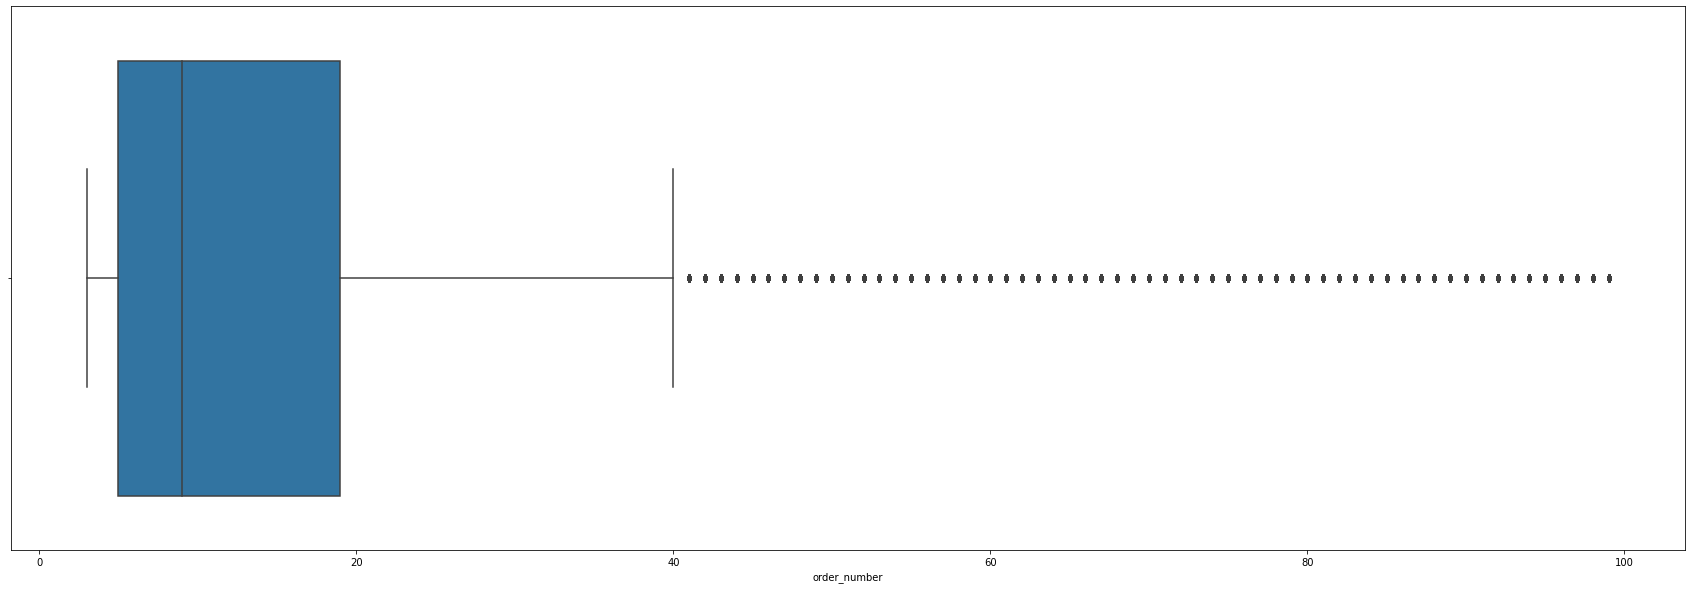

In [55]:
# 박스플롯으로 백분위수를 시각화함과 동시에 이상치를 확인하려고 그렸다.
# 여기서 order_number 40 이상이 이상치로 발견
# 그래서 이상치가 몇명인지 궁금해서 확인해보기로 했다.
plt.figure(figsize=(30,10))
sns.boxplot(data=order_number_count, x='order_number')

In [56]:
order_number_count['order_number'].describe()

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
max          99.000000
Name: order_number, dtype: float64

In [57]:
# 가설: order_number가 40 인 이상을 확인
order_number_vip = order_number_count[order_number_count['order_number'] >= 40]
order_number_vip

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
17,40,40,40,40,40,39
27,81,81,81,81,81,80
50,67,67,67,67,67,66
54,77,77,77,77,77,76
90,71,71,71,71,71,70
...,...,...,...,...,...,...
206158,50,50,50,50,50,49
206174,52,52,52,52,52,51
206193,41,41,41,41,41,40


In [58]:
order_number_normal = order_number_count[order_number_count['order_number'] < 40]
order_number_normal

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206203,5,5,5,5,5,4
206204,4,4,4,4,4,3
206205,3,3,3,3,3,2


In [59]:
# order df 전체 고객수 대비 대략 8.68% 가 40번 이상 구매한 고객이었다
17902/206209

0.08681483349417339

In [60]:
# 이 가설을 prior에 적용시켜보았다 
# 40번 이상 구매한 고객들의 구매한 제품 건수
temp4 = temp3[temp3['order_number'] >=40]
temp4

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
30,156122,5,produce,fresh fruits,Bag of Organic Bananas,42,1,1
31,156122,5,pantry,salad dressing toppings,"Just Crisp, Parmesan",42,2,1
32,156122,5,deli,prepared soups salads,Fresh Fruit Salad,42,3,1
33,156122,5,produce,packaged vegetables fruits,Organic Raspberries,42,4,1
34,156122,5,dairy eggs,milk,2% Reduced Fat Milk,42,5,1
...,...,...,...,...,...,...,...,...
32434398,119835,3421069,produce,fresh fruits,Organic Strawberries,75,8,1
32434399,119835,3421069,produce,fresh vegetables,Organic Cucumber,75,9,1
32434400,119835,3421069,produce,fresh vegetables,Organic Red Potato,75,10,1
32434401,119835,3421069,produce,fresh vegetables,Organic Large Green Asparagus,75,11,1


In [61]:
temp3[temp3['user_id']==156122]

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered
30,156122,5,produce,fresh fruits,Bag of Organic Bananas,42,1,1
31,156122,5,pantry,salad dressing toppings,"Just Crisp, Parmesan",42,2,1
32,156122,5,deli,prepared soups salads,Fresh Fruit Salad,42,3,1
33,156122,5,produce,packaged vegetables fruits,Organic Raspberries,42,4,1
34,156122,5,dairy eggs,milk,2% Reduced Fat Milk,42,5,1
...,...,...,...,...,...,...,...,...
32102348,156122,3386168,snacks,cookies cakes,Biscuits Orange Pim's,19,3,1
32102349,156122,3386168,snacks,nuts seeds dried fruit,No Salt Roasted Pistachios,19,4,1
32102350,156122,3386168,household,paper goods,Sensitive Toilet Paper,19,5,1
32102351,156122,3386168,household,dish detergents,Classic Scent Liquid Dish Soap,19,6,1


In [62]:
#temp4[temp4['user_id']==156122]

In [63]:
vip_df = pd.merge(left=order_number_vip2, right=temp2, how='left')
vip_df

NameError: ignored

In [ ]:
# VIP고객이라도 제품을 많이 구매한 것은 아니다
# 대략 32.8%의 제품을 오더했다
10661601/32454490

In [ ]:
# VIP = 40번 이상 구매한 고객수, 수수료로 설명가능 = 대략 27.21%
# 일반고객 = 40번 미만 구매한 고객수 대략 100-27.21 = 

# 해야 할 일: 정리 코랩 하고 내용

In [ ]:
order_number_vip.describe()

In [ ]:
order_number_normal = order_number_count[order_number_count['order_number'] < 40]
order_number_normal

In [ ]:
len(order_number_normal)/len(order_number_count)

In [ ]:
order_number_normal.describe()

In [ ]:
# VIP vs normal pie graph or histrogram 고객 숫자 그래프

In [ ]:
# 통계 그래프 VIP vs normal

In [ ]:
# 가설확인: 전체 수수료 대비 VIP가 차지하는 비율: 대략 8%의 고객이 32%의 매출을 올렸다
# 시각화 pie graph 필요
fee = 2.99
print(fee * 59 * 17902)
print(fee * order_number_normal['order_number'].mean() * (206208-17902))
print(3158091/(6443125+3158091))

In [ ]:
# 해야 할 일: VIP 품목 구매 패턴 분석 (소분류, 대분류)
# 해야 할 일: 예측 분석 (가설)
# 해야 할 일: 모델 정하기 ()
# 해야 할 일: 

In [ ]:
order_number_vip.info()
order_number_vip

In [ ]:
order_number_vip2 = order_number_vip.reset_index()
order_number_vip2 = order_number_vip2['user_id']
order_number_vip2

In [ ]:
vip_df = pd.merge(left=order_number_vip2, right=temp2, how='left')
vip_df

In [ ]:
vip_df[vip_df['user_id'] == 27]

In [ ]:
temp2[temp2['user_id'] == 27]

In [ ]:
vip_df['aisle'].unique()

In [ ]:
vip_df['department'].unique()

In [ ]:
vip_department = vip_df.groupby(['department']).count().sort_values(by='user_id', ascending=False)
vip_department

In [ ]:
vip_department['user_id']

In [ ]:
sns.barplot(data=vip_department, x='user_id', y=vip_department.index)

In [ ]:
vip_department.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vip_department_sk = scaler.fit_transform(vip_department[['user_id']])
vip_department_sk

In [ ]:
vip_department_sk = pd.DataFrame(vip_department_sk)
vip_department_sk

In [ ]:
# standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vip_department_mm = scaler.fit_transform(vip_department_sk)

In [ ]:
vip_department_mm = pd.DataFrame(vip_department_mm)
vip_department_mm

In [ ]:
vip_aisle = vip_df.groupby(['aisle']).count().sort_values(by='user_id', ascending=False)
vip_aisle

In [ ]:
vip_aisle['user_id']

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=vip_aisle, x='user_id')


In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=vip_department, x='user_id')

In [ ]:
# minmax
sns.barplot(data=vip_department_mm, x=vip_department_mm.index, y=0)

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=vip_department_mm)